In [1]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model_desc_sentence')

def calculate_cosine_similarity(dataset):
    embeddings = [word2vec_model.wv[word] for word in dataset]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

# Example usage
# Dataset ska ersättas med en lista med meningar som innehåller dåliga ord
dataset = ['stark', 'analytisk', 'chef', 'drivkraft', 'analys', 'driven']
similarity_matrix = calculate_cosine_similarity(dataset)

print("Similarity Matrix:")
for i, word1 in enumerate(dataset):
    for j, word2 in enumerate(dataset):
        print(f"{word1} - {word2}: {similarity_matrix[i, j]}")


Similarity Matrix:
stark - stark: 1.0
stark - analytisk: 0.5300168991088867
stark - chef: 0.10812292993068695
stark - drivkraft: 0.7895435690879822
stark - analys: -0.028596296906471252
stark - driven: 0.45643123984336853
analytisk - stark: 0.5300168991088867
analytisk - analytisk: 1.0
analytisk - chef: 0.14528852701187134
analytisk - drivkraft: 0.6331475973129272
analytisk - analys: 0.1006714403629303
analytisk - driven: 0.7838827967643738
chef - stark: 0.10812292993068695
chef - analytisk: 0.14528852701187134
chef - chef: 1.0
chef - drivkraft: 0.19973522424697876
chef - analys: 0.019663985818624496
chef - driven: 0.2207806557416916
drivkraft - stark: 0.7895435690879822
drivkraft - analytisk: 0.6331475973129272
drivkraft - chef: 0.19973522424697876
drivkraft - drivkraft: 0.9999997019767761
drivkraft - analys: 0.0890732929110527
drivkraft - driven: 0.48601865768432617
analys - stark: -0.028596296906471252
analys - analytisk: 0.1006714403629303
analys - chef: 0.019663985818624496
analys

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


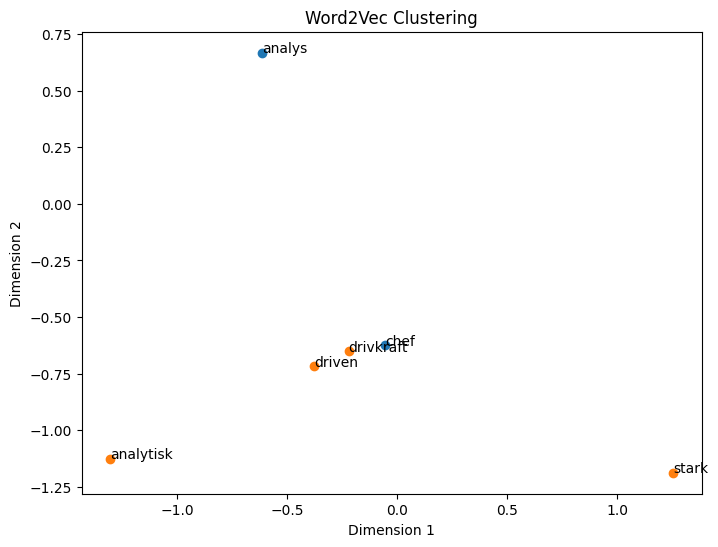

In [25]:
# Kmeans clustering
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model_desc_sentence')

def calculate_cosine_similarity(dataset):
    embeddings = [word2vec_model.wv[word] for word in dataset]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

def cluster_and_visualize(dataset, num_clusters=2):
    # Calculate cosine similarity matrix
    similarity_matrix = calculate_cosine_similarity(dataset)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(similarity_matrix)

    # Retrieve word embeddings
    embeddings = [word2vec_model.wv[word] for word in dataset]

    # Visualize scatter plot
    plt.figure(figsize=(8, 6))
    for i, (word, cluster) in enumerate(zip(dataset, cluster_labels)):
        x = embeddings[i][0]
        y = embeddings[i][1]
        plt.scatter(x, y, color='C'+str(cluster))
        plt.text(x, y, word, fontsize=10)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word2Vec Clustering')
    plt.show()

# Example usage
dataset = ['stark', 'analytisk', 'chef', 'drivkraft', 'analys', 'driven']
cluster_and_visualize(dataset, num_clusters=2)


In [32]:
# spectral clustering
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import pandas as pd
from gensim.utils import simple_preprocess

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model_desc_sentence')
df = pd.read_csv("sentences__filtered_analys.csv")

def calculate_cosine_similarity(dataset):
    embeddings = [word2vec_model.wv[word] for word in dataset]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

def cluster_and_visualize(dataset, num_clusters=2):
    # Calculate cosine similarity matrix
    similarity_matrix = calculate_cosine_similarity(dataset)

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed')
    cluster_labels = spectral.fit_predict(similarity_matrix)

    # Retrieve word embeddings
    embeddings = [word2vec_model.wv[word] for word in dataset]

    # Visualize scatter plot
    plt.figure(figsize=(8, 6))
    for i, (word, cluster) in enumerate(zip(dataset, cluster_labels)):
        x = embeddings[i][0]
        y = embeddings[i][1]
        plt.scatter(x, y, color='C'+str(cluster))
        plt.text(x, y, word, fontsize=10)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word2Vec Clustering (Spectral)')
    plt.show()

# Example usage
dataset = []
description_text = df["sentence"]
#for text in description_text:
 #   preprocess = simple_preprocess(text)
  #  dataset.append(preprocess)
for text in description_text:
    if pd.notnull(text) and text.strip() != "":
        preprocess = simple_preprocess(text)
        dataset.append(preprocess)

cluster_and_visualize(dataset, num_clusters=2)


ValueError: need at least one array to concatenate

In [33]:
# lösningsförslag från chatGPT på error från föregående kodblock

from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import pandas as pd
from gensim.utils import simple_preprocess

# Load pre-trained Word2Vec model
word2vec_model = Word2Vec.load('word2vec_model_desc_sentence')
df = pd.read_csv("sentences__filtered_analys.csv")

def calculate_cosine_similarity(dataset):
    embeddings = [word2vec_model.wv[word] for word in dataset]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

def cluster_and_visualize(dataset, num_clusters=2):
    # Calculate cosine similarity matrix
    similarity_matrix = calculate_cosine_similarity(dataset)

    # Apply Spectral Clustering
    spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed')
    cluster_labels = spectral.fit_predict(similarity_matrix)

    # Retrieve word embeddings
    embeddings = [word2vec_model.wv[word] for word in dataset]

    # Visualize scatter plot
    plt.figure(figsize=(8, 6))
    for i, (word, cluster) in enumerate(zip(dataset, cluster_labels)):
        x = embeddings[i][0]
        y = embeddings[i][1]
        plt.scatter(x, y, color='C'+str(cluster))
        plt.text(x, y, word, fontsize=10)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Word2Vec Clustering (Spectral)')
    plt.show()

# Example usage
dataset = []
description_text = df["sentence"]

for text in description_text:
    if pd.notnull(text) and text.strip() != "":
        preprocess = simple_preprocess(text)
        dataset.append(preprocess)

cluster_and_visualize(dataset, num_clusters=2)


ValueError: need at least one array to concatenate